# Introduction to Timeseries Data in Python

## Why use Datetime object

Python datetime object will make working with and plotting timeseries data easier. You can convert pandas dataframe columns containing dates and times as strings into datetime objects.

In [1]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle datetime conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel("ERROR")

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
# Download the data
data = et.data.get_data("colorado-flood")

# Set working dir
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [5]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                        "precipitation",
                        "805325-precip-daily-2003-2013.csv")

# Import file as pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


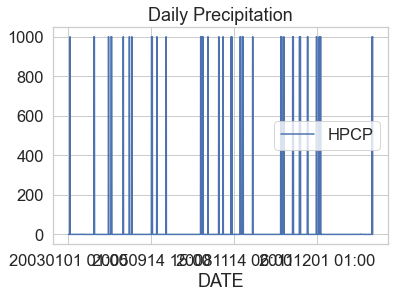

In [7]:
boulder_precip_2003_2013.plot(x="DATE",
                             y="HPCP",
                             title="Daily Precipitation")

plt.show()

### Timeseries data cleaning & exploration

The data above do not look right. Take some time to explore the data to better understand what you need to clean up.

In [8]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [9]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

There are several anomalies in the data.
1. The data seem to have a very large number: 999.99. More often than note, a value of 999 represents a no data value that needs to be removed from your data.
2. You may have noticed that your x axis date values in the plot look "messy". When you see an x-axis like this but you know your data are timeseries, it's most often caused by your datetime data not being read in properly as numeric date times.

You can address all of these issues using the following read_csv() parameters:
- parse:dates= : Column containing date information that should be read into the DataFrame as a datetime object.
- na_values= : Values in the file that should be replaced with NaN (Not a Number)
- index_col=1 : optional - but this will make subsetting the data much easier

In [18]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                      # Make sure the dates import in datetime format
                                      parse_dates=["DATE"],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=["DATE"],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=["999.99"])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


Note above that the DATE column header is visually lower than the other columns and the entire column is bold. This represents the DATE column as an index. You set the DATE column as an index above using the parameter:

index_col=["DATE"]

Once your date values are an index, you can more easily subset the data by time period

In [19]:
# View summary statistics == Notice the DATE column is not included
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


Notice that once you remove no data values, the min and max for HPCP cols are more reasonable for hourly precipitation ranging from 0 to 2.2.

### Using an index in pandas

Assigning an index column is helpful when using timeseries data as it allows you to easily subset your data by time

It is also important to know that once a column is an index, you need to call it differently. FOr instance, you run .dtypes on your data. Notice that DATE is no longer a column described in your dataframe.

In [20]:
# Where is the data column
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [21]:
# View the index for your dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

You can also reset the index if you want to turn it back into a normal column using data-frame.reset_index()

In [24]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


Now that you have cleaned up the data, you can plot it. Below, you use .plot() to plot. If you have an index column, then .plot() will auto select that column to plot on the x-axis. You then only need to specify the y.axis column

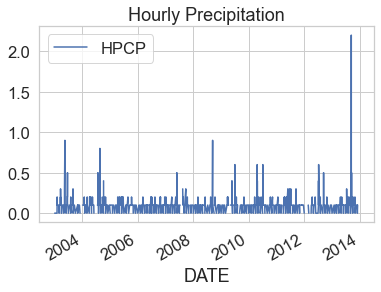

In [25]:
boulder_precip_2003_2013.plot(y="HPCP",
                             title="Hourly Precipitation")

plt.show()

## Subset timeseries data by time

Once you have cleaned up your data, and assigned a datetime index, you can quickly begin to plot and summarise data by time periods.

In [26]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013["2005"]
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


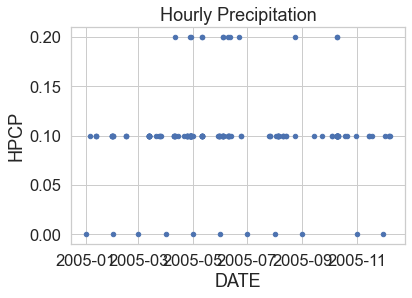

In [27]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

# Plot the data using pandas
precip_2005_clean.reset_index().plot(x="DATE",
                                    y="HPCP",
                                    title="Hourly Precipitation",
                                    kind="scatter")

plt.show()

While you can plot data with pandas, it's often easier to simply use matplotlib directly as this gives you more control of your plots. Below you create a scatter plot of the data using ax.scatter.

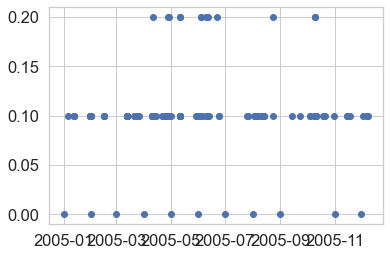

In [28]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
          y=precip_2005_clean["HPCP"])
plt.show()

## Resample Timeseries data

Resampling timeseries data refers to the act of summarising data over different time periods. For example, above you have been working with hourly data. However, you may want to plot data summarised by day.

You can resample timeseries data in Pandas using the resample() method. Within that method you call the time frequency for which you want to resample. Examples including day ("D") or week ("w").

When you resample data, you need to also tell Python how you wish to summarise the data for that time period. For example do you want to summarise or add all values for each day?

precip_2005_clean.resample("D").sum()

or do you want a max value:

precip_2005_clean.resample("D").max()

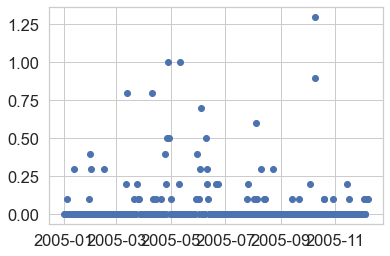

In [29]:
precip_2005_daily = precip_2005_clean.resample("D").sum()

# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
          y=precip_2005_daily["HPCP"])

plt.show()

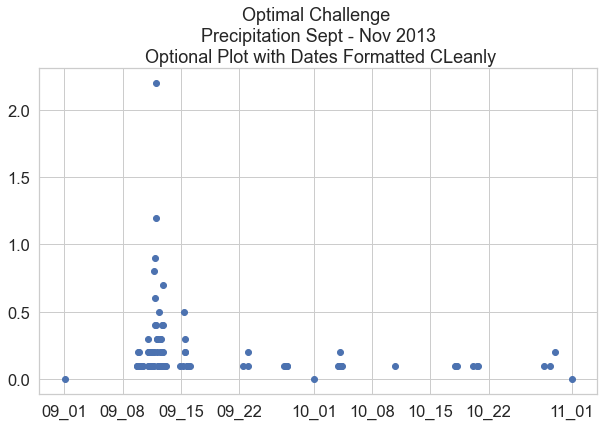

In [30]:
from matplotlib.dates import DateFormatter

# Place your code to plot your data here
flood_data = boulder_precip_2003_2013["2013-09-01":"2013-11-01"]

f, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=flood_data.index.values,
          y=flood_data["HPCP"])

# Define the date format
date_form = DateFormatter("%m_%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optimal Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted CLeanly")
plt.show()